<a href="https://colab.research.google.com/github/Sarahiperbolica/Masterclass_OG_2025/blob/main/Soluzioni/Tuto_2_Generating_waveforms_ita_soluzioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="float: left;padding: 1.3em">![logo](https://github.com/gw-odw/odw-2024/blob/main/Tutorials/logo.png?raw=1)</span>

#  Workshop Onde Gravitazionali

#### Tutorial 2: Generazione delle Onde

In questo tutorial, impareremo come generare il **segnale delle onde gravitazionali** prodotto quando due oggetti densi—come buchi neri o stelle di neutroni—si fondono. Questi eventi, chiamati **coesioni binarie compatte**, inviano onde nello spazio-tempo, che possiamo rilevare sulla Terra!

Per farlo, utilizzeremo una libreria Python speciale chiamata **PyCBC** ([dai un'occhiata qui](http://github.com/ligo-cbc/pycbc)). PyCBC aiuta gli scienziati ad analizzare i dati reali delle onde gravitazionali, simulare segnali astrofisici e studiare le proprietà degli oggetti in fusione. Viene utilizzato dai ricercatori nelle collaborazioni **LIGO** e **Virgo**, così come da scienziati di tutto il mondo.

Vuoi provarlo? **Clicca [su questo link](https://colab.research.google.com/github/gw-odw/odw-2024/blob/main/Tutorials/Day_1/Tuto_1.4_Generating_waveforms.ipynb)** per aprire questo tutorial su **Google Colaboratory**, dove puoi eseguire il codice in modo interattivo! 🚀

##  Installazione

In [ ]:
# -- Uncomment following line if running in Google Colab
! pip install --upgrade pip setuptools wheel
! pip install git+https://github.com/gwastro/pycbc.git


  Cloning https://github.com/gwastro/pycbc.git to /tmp/pip-req-build-21wpcomu
  Running command git clone --filter=blob:none --quiet https://github.com/gwastro/pycbc.git /tmp/pip-req-build-21wpcomu
  Resolved https://github.com/gwastro/pycbc.git to commit 28d74c0351aeae822e081e6c0d778c9b97d4374f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 4

## Installazione

In [ ]:
from pycbc.waveform import get_td_waveform, fd_approximants
import pylab

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


# Genera il Tuo Primo Segnale Gravitazionale! 🌊✨

Ora è il momento di **generare un segnale delle onde gravitazionali**! Utilizzeremo un modello matematico per simulare le onde prodotte quando due buchi neri o stelle di neutroni si fondono.

Per farlo, utilizziamo funzioni speciali di PyCBC:

* `get_td_waveform()` → Genera l'onda nel **dominio del tempo** (come quando sentiamo il suono nel tempo).
* `get_fd_waveform()` → Genera l'onda nel **dominio della frequenza** (come guardare le diverse tonalità in una canzone).

🔎 Fattori chiave che influenzano la forma dell'onda:

* Le **masse** dei due oggetti (misurate in masse solari ☀️)
* Il **tempo** tra i campioni (quanto dettagliata è la nostra onda)
* La **frequenza iniziale** (da dove cominciano le onde)
* Il **modello dell'onda** ("approssimante") (una formula per descrivere le onde)

Nel nostro esempio, utilizziamo un modello chiamato "IMRPhenomD", che si basa su fisica dettagliata e simulazioni numeriche. Questo modello è spiegato [in questo articolo](https://arxiv.org/pdf/1508.07253.pdf).

🚀 Vuoi esplorare di più? Dai un'occhiata a questa pagina [qui](http://pycbc.org/pycbc/latest/html/waveform.html) per scoprire altre opzioni di forma d'onda!

In [ ]:
from pycbc.waveform import td_approximants, fd_approximants

# Elenco degli approssimanti td disponibili
print('Forme d\'onda nel dominio del tempo: ', td_approximants())

# Elenco degli approssimanti fd attualmente disponibili
print('Forme d\'onda nel dominio della frequenza: ', fd_approximants())


Forme d'onda nel dominio del tempo:  ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhe

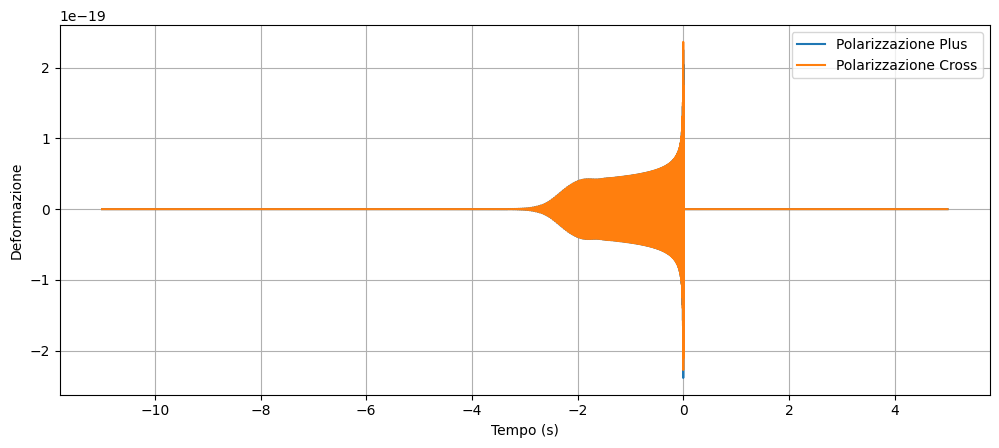

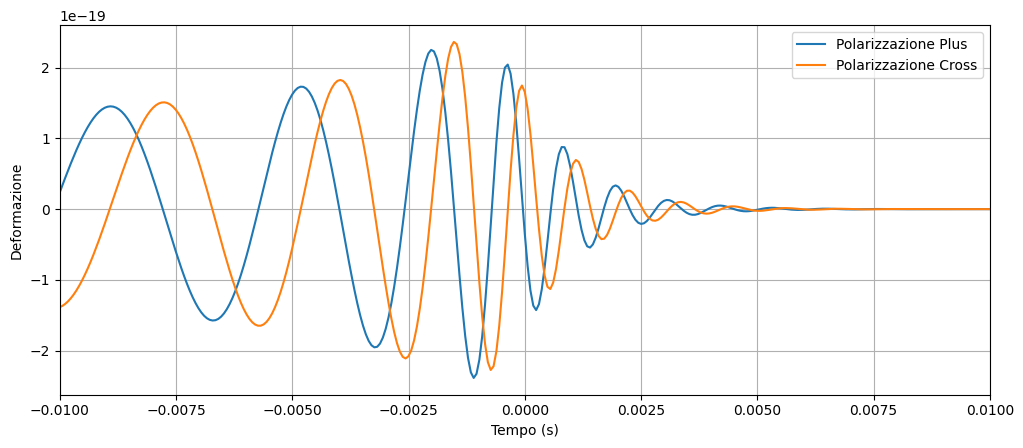

In [ ]:
# I risultati di questa funzione sono le polarizzazioni "plus" e "cross"
# del segnale gravitazionale come visto dalla linea di vista con
# una data inclinazione della sorgente (assunta faccia a faccia, ovvero inclinazione zero
# se non fornita)
hp, hc = get_td_waveform(approximant="IMRPhenomD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Polarizzazione Plus')
pylab.plot(hp.sample_times, hc, label='Polarizzazione Cross')
pylab.xlabel('Tempo (s)')
pylab.ylabel('Deformazione')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom nella zona vicina al tempo di fusione
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Polarizzazione Plus')
pylab.plot(hp.sample_times, hc, label='Polarizzazione Cross')
pylab.xlabel('Tempo (s)')
pylab.ylabel('Deformazione')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

In questo caso, osserviamo che le **due polarizzazioni** del segnale delle onde gravitazionali differiscono solo nella loro **fase** (sono versioni spostate l'una dell'altra). Questo accade quando il piano orbitale del sistema binario non precessa, il che significa che gli spin dei buchi neri sono allineati con il moto orbitale.

🔎 Cosa possiamo vedere nel grafico ingrandito?
* La **fusione** (quando i due oggetti collidono)
* Il **ringdown** (quando il buco nero appena formato si stabilizza in una forma stabile)

🛠️ Vuoi provare un modo diverso di guardare il segnale?
Invece di visualizzarlo nel dominio del tempo, possiamo generare la stessa forma d'onda nel **dominio delle frequenze** usando la funzione `get_fd_waveform()`. Questo ci mostra come le diverse frequenze contribuiscono al segnale! 🎵

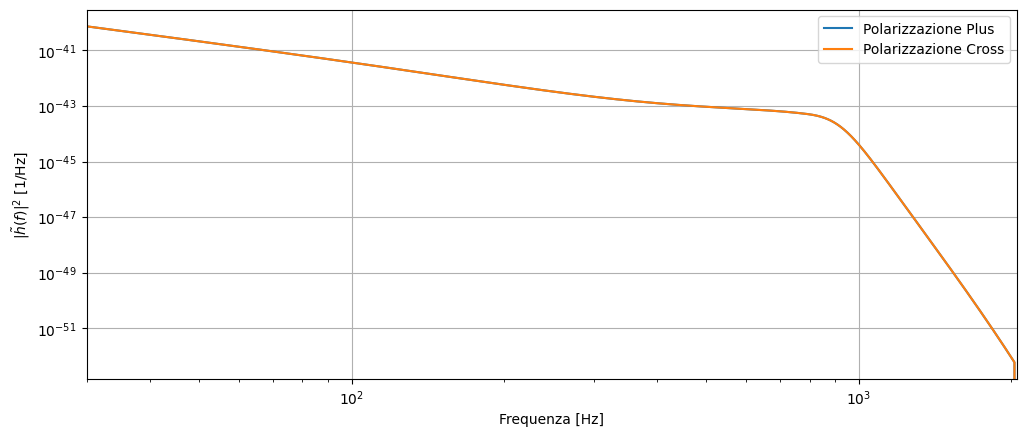

In [ ]:
from pycbc.waveform import get_fd_waveform

hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30,
                         delta_f=1.)

pylab.figure(figsize=pylab.figaspect(0.4))

# Tracceremo il quadrato della norma delle componenti di Fourier delle polarizzazioni del segnale.
# Per un sistema binario visto frontalmente, le polarizzazioni più e incrociate differiscono solo per un termine di fase. Pertanto, le due norme quadratiche saranno uguali.
pylab.loglog(hp.sample_frequencies, hp.squared_norm(), label='Polarizzazione Plus')
pylab.loglog(hp.sample_frequencies, hc.squared_norm(), label='Polarizzazione Cross')
pylab.xlabel('Frequenza [Hz]')
pylab.ylabel(r'$|\tilde{h}(f)|^2$ [1/Hz]')
pylab.xlim([30,2048])
pylab.legend()
pylab.grid()
pylab.show()


### Come cambia la forma d'onda con la massa?

Quando cambia la massa del sistema binario, cambia anche la forma d'onda gravitazionale!

🔎 Cosa succede quando la massa è più bassa?

* La forma d'onda dura di più (la fase di ispiralamento è estesa).
* La frequenza aumenta in modo più graduale prima del merger.

Gli oggetti più leggeri (come le stelle di neutroni) impiegano più tempo per spiraleggiare l'uno verso l'altro, emettendo onde gravitazionali per un periodo più lungo. I sistemi più pesanti (come i buchi neri) si fondono molto più rapidamente!

Questa funzione **confronta come i segnali delle onde gravitazionali cambiano quando le masse** dei due oggetti che si fondono (ad esempio, buchi neri o stelle di neutroni) sono diverse. Lo fa tracciando più forme d'onda per diverse masse.

In [ ]:
import pylab
from pycbc.waveform import get_td_waveform

def confronta_forme_donda(lista_masse):
    """
    Questa funzione confronta i segnali delle onde gravitazionali per diverse masse degli oggetti che si fondono
    (come buchi neri o stelle di neutroni). Genera e traccia le forme d'onda per mostrare come cambiano.
    (Qui semplifichiamo e assumiamo che ogni componente del sistema binario abbia la stessa massa)

    Parametri:
    - lista_masse: Una lista di masse (in masse solari, M☉) per entrambi gli oggetti che si fondono.

    La funzione genererà e visualizzerà un grafico che confronta le forme d'onda per ciascuna massa.
    """

    # Imposta il grafico con un buon rapporto di aspetto
    pylab.figure(figsize=(10, 4))

    # Ciclo attraverso ogni massa nella lista fornita
    for massa in lista_masse:

        # Genera la forma d'onda gravitazionale per un sistema binario con masse uguali
        polarizzazione_plus, polarizzazione_cross = get_td_waveform(
            approximant="IMRPhenomD",  # Il modello di forma d'onda che stiamo usando
            mass1=massa,  # Massa del primo oggetto (in masse solari)
            mass2=massa,  # Massa del secondo oggetto (uguale al primo)
            delta_t=1.0/4096,  # Risoluzione temporale della forma d'onda
            f_lower=30  # Frequenza minima da includere
        )

        # Traccia la forma d'onda della polarizzazione "plus"
        pylab.plot(polarizzazione_plus.sample_times, polarizzazione_plus, label=f'Massa = {massa} M☉')

    # Aggiungi etichette e griglia al grafico per una migliore leggibilità
    pylab.xlabel('Tempo (secondi)')  # L'asse X rappresenta il tempo
    pylab.ylabel('Strain (intensità dell\'onda)')  # L'asse Y rappresenta l'intensità dell'onda
    pylab.title('Forme d\'onda Gravitazionali per Diverse Masse')  # Titolo del grafico
    pylab.xlim(-.1, .01)
    pylab.legend()  # Mostra le etichette per le diverse masse
    pylab.grid()  # Aggiungi linee della griglia per maggiore chiarezza

    # Mostra il grafico
    pylab.show()


Ora tocca a te!  
Prova a fare questo: modifica la lista delle masse e osserva come cambiano le forme d'onda!

* Come cambia la durata della forma d'onda con la massa?
* Cosa succede alla frequenza e all'ampiezza dell'onda man mano che la massa aumenta?
* Riesci a spiegare perché le binarie a bassa massa hanno forme d'onda più lunghe?

#Soluzioni

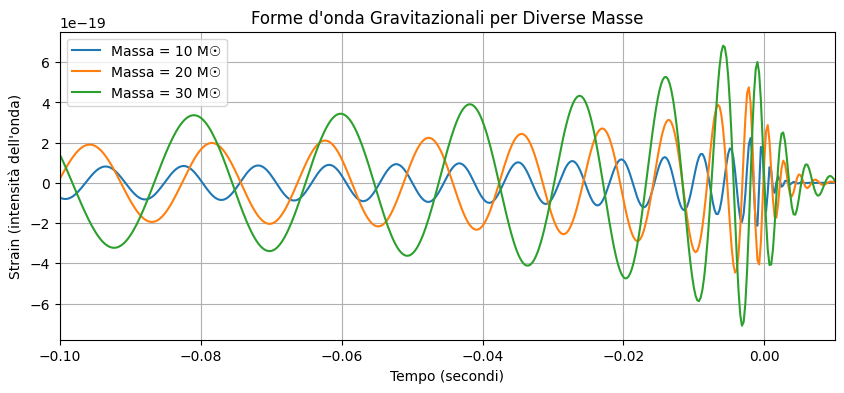

In [ ]:
lista_masse = [10,20,30]
confronta_forme_donda(lista_masse)

# Cambiare la Distanza di un Segnale di Onde Gravitazionali  
Quando generiamo un segnale di onde gravitazionali, possiamo anche impostare la distanza della sorgente. Questo è chiamato **distanza di luminosità** ed è misurato in **Megaparsec** (Mpc).

📏 Cos'è un Megaparsec?

* 1 Megaparsec (Mpc) = 1.000.000 parsec
* 1 parsec ≈ 3,26 anni luce

Quindi, 1 Mpc ≈ 3,26 milioni di anni luce!

 🔎 Come la Distanza Influisce sulla Forma d'Onda? Se la sorgente è più vicina, l'onda è **più forte** (**ampiezza maggiore**). Se la sorgente è più lontana, l'onda è **più debole** (**ampiezza minore**). Poiché non stiamo considerando l'**espansione** dell'universo (**effetti di redshift**), la relazione è semplice e lineare:

  * Raddoppia la distanza → metà della forza dell'onda
  * Triplica la distanza → un terzo della forza dell'onda

Immagina di essere vicino a un altoparlante. Se ti allontani, il suono diventa più debole. Le onde gravitazionali si comportano allo stesso modo nello spazio!

Questa funzione mostra come il segnale di onde gravitazionali cambia quando la sorgente è situata a diverse distanze.

In [ ]:
import pylab
from pycbc.waveform import get_td_waveform

def plot_confronto_distanze(lista_distanze):
    """
    Questa funzione mostra come cambia il segnale delle onde gravitazionali
    quando la sorgente si trova a diverse distanze.

    Parametri:
    - lista_distanze: Una lista di distanze (in Megaparsec, Mpc) dove si trova la sorgente dell'onda.

    La funzione genera e traccia le forme d'onda per ogni distanza.
    """

    # Crea una figura con un buon rapporto di aspetto
    pylab.figure(figsize=pylab.figaspect(0.4))

    # Cicla attraverso ogni distanza nella lista
    for d in lista_distanze:
        # Genera la forma d'onda per un sistema binario con due oggetti di 10 masse solari
        hp, hc = get_td_waveform(approximant="IMRPhenomD",
                                 mass1=10,  # Massa del primo oggetto (10 masse solari)
                                 mass2=10,  # Massa del secondo oggetto (10 masse solari)
                                 delta_t=1.0/4096,  # Passo temporale per la forma d'onda
                                 f_lower=30,  # Frequenza minima considerata (Hz)
                                 distance=d)  # Distanza della sorgente (Mpc)

        # Traccia la forma d'onda (deformazione in funzione del tempo) e etichettala con la sua distanza
        pylab.plot(hp.sample_times, hp, label=f'Distanza = {d} Mpc')

    # Aggiungi una legenda per identificare ogni curva
    pylab.legend()

    # Aggiungi le linee della griglia per rendere il grafico più leggibile
    pylab.grid()

    # Etichetta l'asse x e l'asse y
    pylab.xlabel('Tempo (secondi)')
    pylab.ylabel('Deformazione (intensità dell\'onda)')
    pylab.xlim(-0.1, .01)

    # Mostra il grafico
    pylab.show()


# Soluzioni

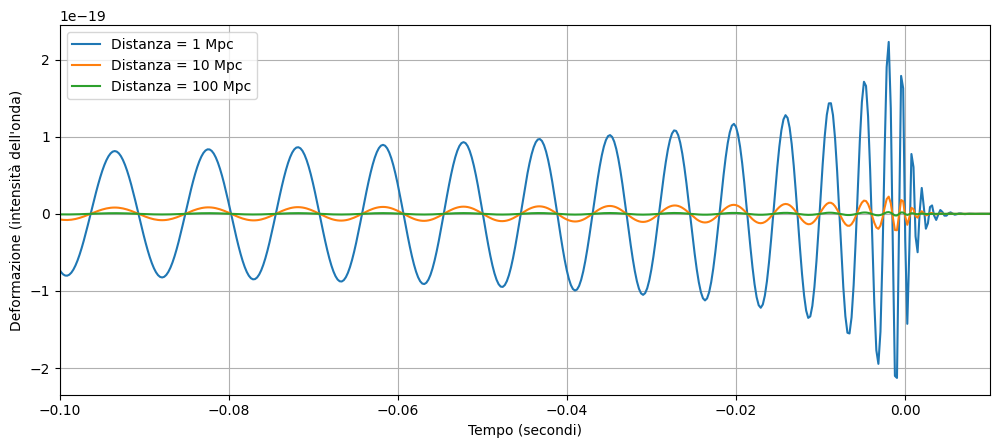

In [ ]:
lista_distanze = [1,10,100]
plot_confronto_distanze(lista_distanze)